## Ćwiczenie 12- Poprawa jakości poprzez wieloetapowe przetwarzanie

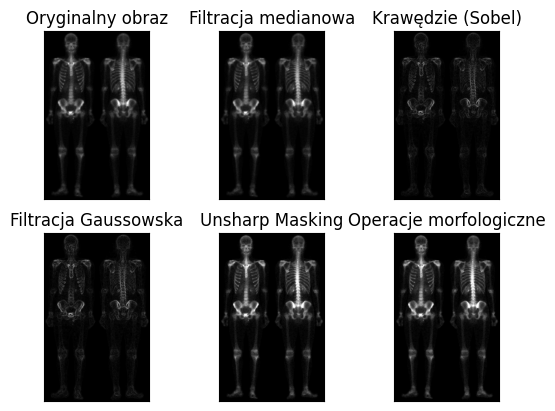

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def improve_image_quality(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Krok 1: Filtracja medianowa - redukcja szumów
    median_filtered = cv2.medianBlur(img, 5)
    
    # Krok 2: Filtr Sobela - wykrywanie krawędzi
    sobel_x = cv2.Sobel(median_filtered, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(median_filtered, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    # Krok 3: Filtracja Gaussowska - wygładzanie obrazu
    gaussian_filtered = cv2.GaussianBlur(sobel_combined, (5, 5), 0)
    
    # Krok 4: Unsharp Masking - wyostrzanie obrazu
    unsharp_mask = cv2.addWeighted(img, 1.5, gaussian_filtered, -0.5, 0)
    
    # Krok 5: Operacje morfologiczne - poprawa struktury obrazu
    kernel = np.ones((3, 3), np.uint8)
    morph_open = cv2.morphologyEx(unsharp_mask, cv2.MORPH_OPEN, kernel)
    morph_close = cv2.morphologyEx(morph_open, cv2.MORPH_CLOSE, kernel)
    
    # Wyświetlenie wyników na każdym etapie
    titles = ['Oryginalny obraz', 'Filtracja medianowa', 'Krawędzie (Sobel)', 'Filtracja Gaussowska', 'Unsharp Masking', 'Operacje morfologiczne']
    images = [img, median_filtered, sobel_combined, gaussian_filtered, unsharp_mask, morph_close]
    
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()

# Przykładowe użycie:
improve_image_quality('pliki/bonescan.tif')